In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, silhouette_score

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


df=pd.read_csv('iris.csv')

print(df.isnull().sum())
print(df.info())
df

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


<AxesSubplot: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

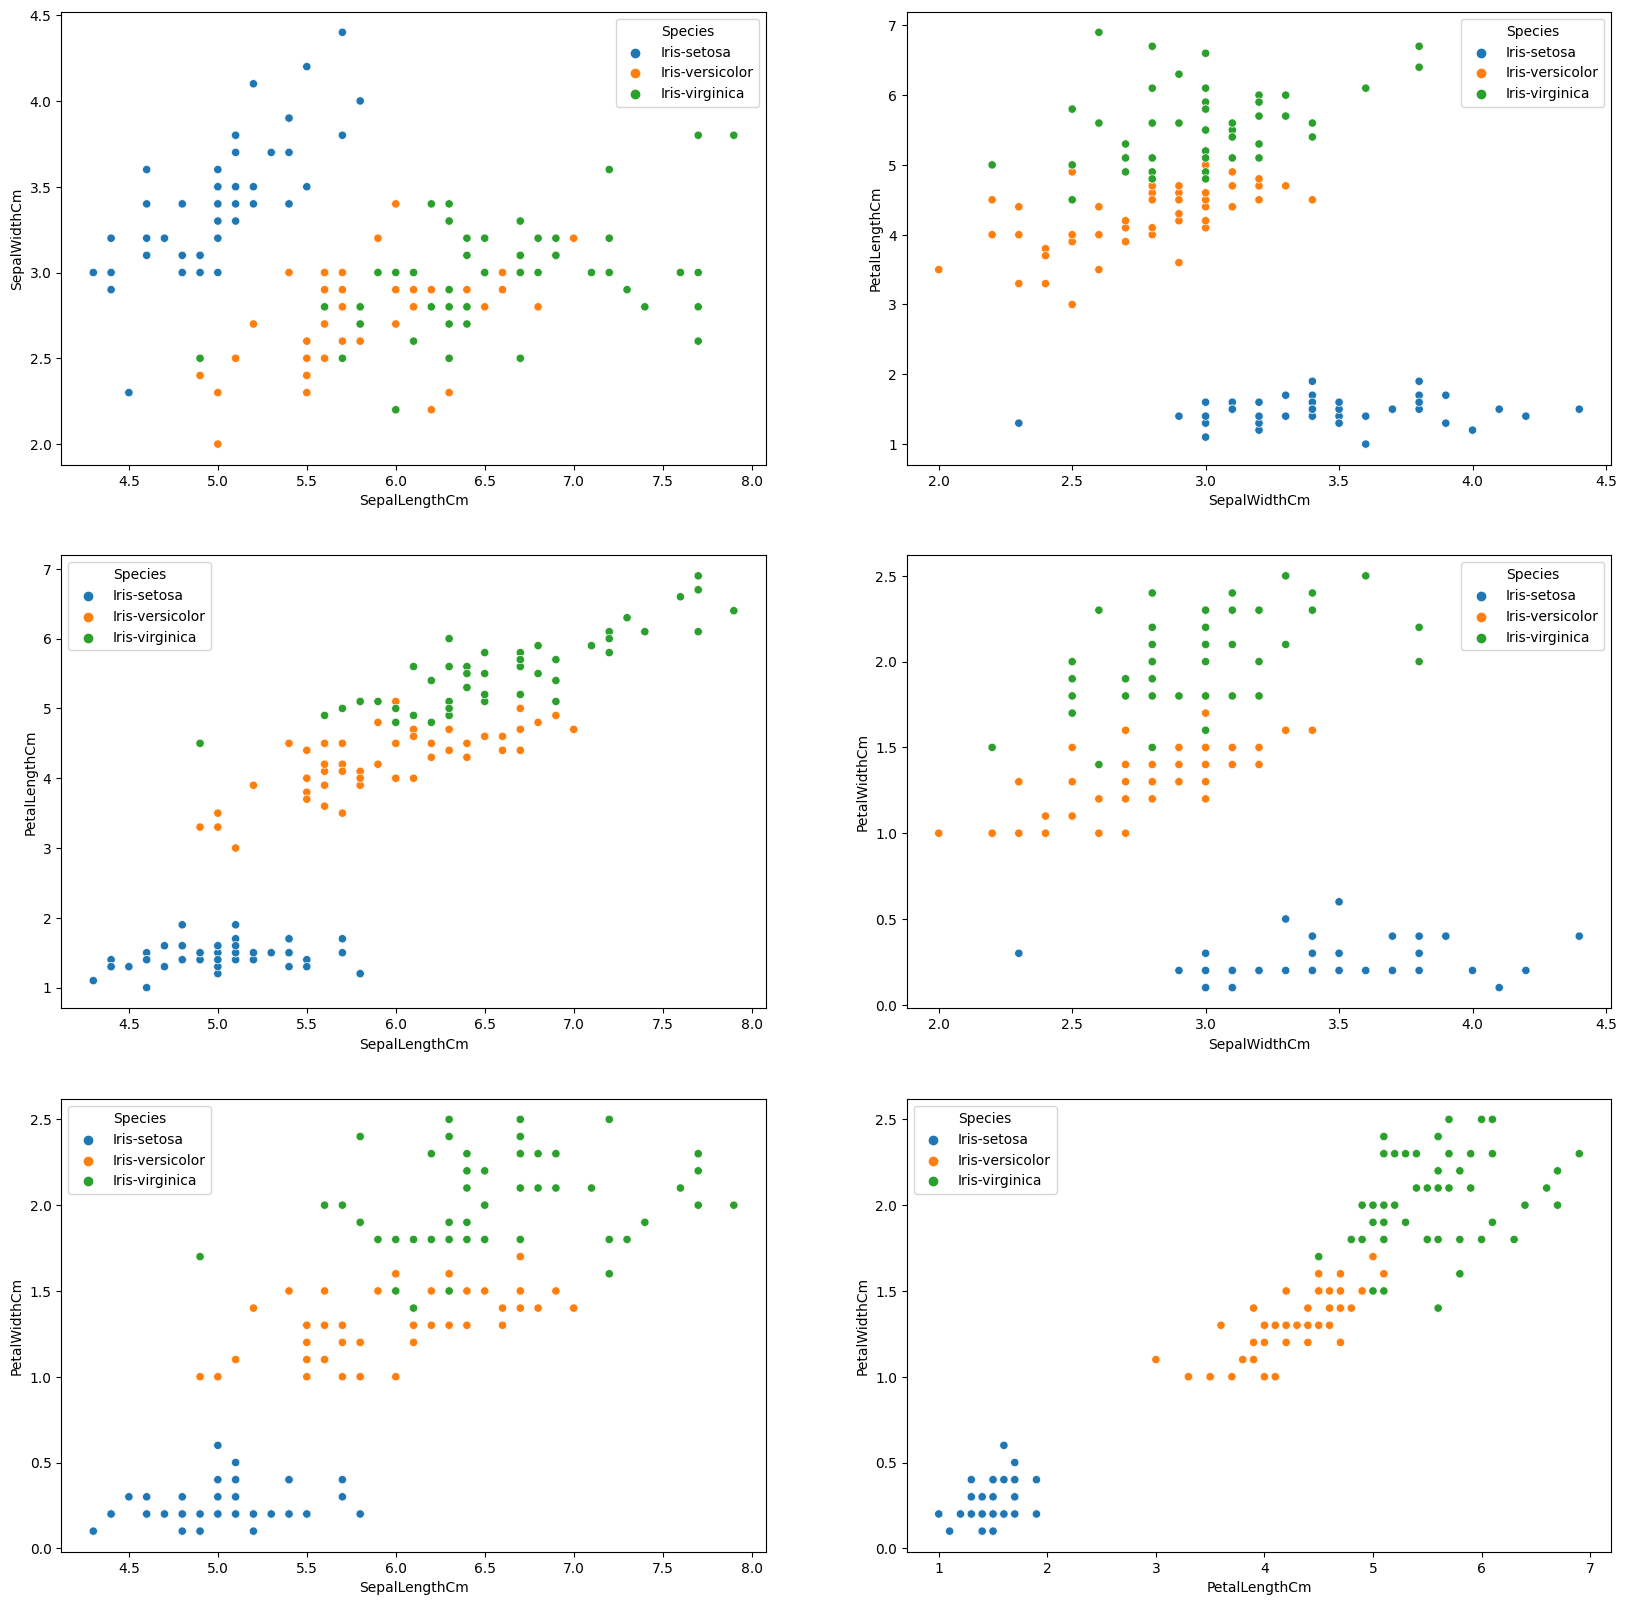

In [3]:
fig, ax=plt.subplots(3,2,figsize=(20,20))
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm', hue='Species', data=df,ax=ax[0][0])
sns.scatterplot(x='SepalLengthCm',y='PetalLengthCm', hue='Species', data=df,ax=ax[1][0])
sns.scatterplot(x='SepalLengthCm',y='PetalWidthCm', hue='Species', data=df,ax=ax[2][0])
sns.scatterplot(x='SepalWidthCm',y='PetalLengthCm', hue='Species', data=df,ax=ax[0][1])
sns.scatterplot(x='SepalWidthCm',y='PetalWidthCm', hue='Species', data=df,ax=ax[1][1])
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm', hue='Species', data=df,ax=ax[2][1])


Petal width vs petal length and Petal width and sepal width are the most promising for separating into clusters

Data size:
(150, 2)


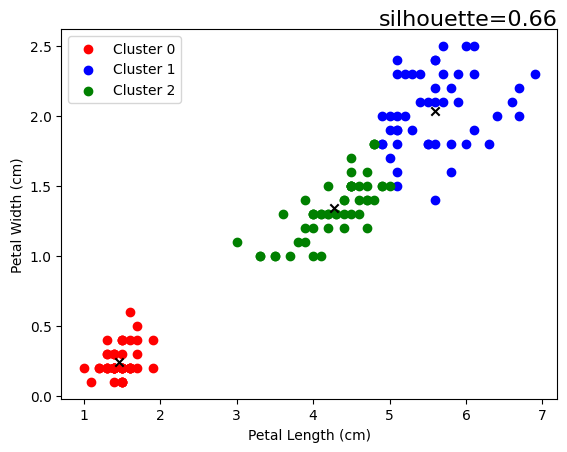

Score: -31.38775897435898


In [7]:
X = df[['PetalLengthCm','PetalWidthCm']].values.reshape(-1,2)  

print('Data size:')
print(X.shape)

k=3
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
y_pred = kmeans.fit_predict(X)
colours = 'rbgcmy'
for c in range(k):
  plt.scatter(X[y_pred == c, 0], X[y_pred == c,1], c = colours[c], label = 'Cluster {}'.format(c))
  plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c = 'black')

score = round(silhouette_score(X, kmeans.labels_, metric='euclidean'),2)
plt.title('silhouette={}'.format(score), loc='right', fontdict={'fontsize': 16}, pad=-14)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()  
print("Score:", kmeans.score(X))

Data size:
(150, 2)


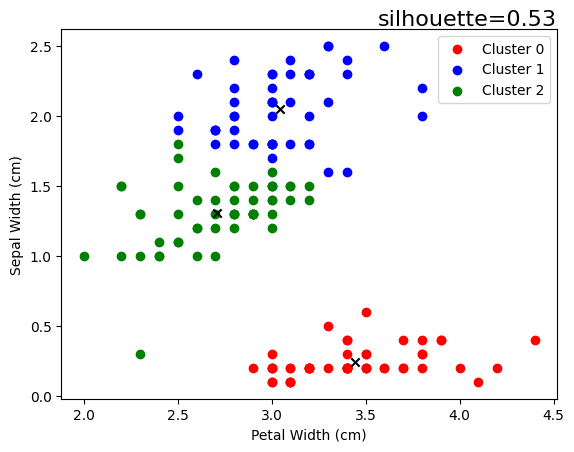

Score: -20.717089831215503


In [5]:
X = df[['SepalWidthCm','PetalWidthCm']].values.reshape(-1,2)  

print('Data size:')
print(X.shape)

k=3
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
y_pred = kmeans.fit_predict(X)
colours = 'rbgcmy'
for c in range(k):
  plt.scatter(X[y_pred == c, 0], X[y_pred == c,1], c = colours[c], label = 'Cluster {}'.format(c))
  plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c = 'black')

score = round(silhouette_score(X, kmeans.labels_, metric='euclidean'),2)
plt.title('silhouette={}'.format(score), loc='right', fontdict={'fontsize': 16}, pad=-14)
plt.xlabel('Petal Width (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()  
print("Score:", kmeans.score(X))